In [1]:
import pandas as pd
import numpy as np
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, roc_curve, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
target1 = pd.read_csv('data/current_target.csv')

In [3]:
target1

,date,county,state,fips,cases,deaths
0,2020-05-12,Autauga,Alabama,1001.0,91,4
1,2020-05-12,Baldwin,Alabama,1003.0,227,7
2,2020-05-12,Barbour,Alabama,1005.0,67,1
3,2020-05-12,Bibb,Alabama,1007.0,46,1
4,2020-05-12,Blount,Alabama,1009.0,45,0
...,...,...,...,...,...,...
2910,2020-05-12,Sublette,Wyoming,56035.0,3,0
2911,2020-05-12,Sweetwater,Wyoming,56037.0,20,0
2912,2020-05-12,Teton,Wyoming,56039.0,98,1
2913,2020-05-12,Uinta,Wyoming,56041.0,9,0


In [10]:
sociohealth = pd.read_csv('data/sociohealth.csv')
sociohealth

,FIPS,Pop_Dens,perc_below_pov,perc_disabled,perc_minority,percent_multiunit_housing,perc_overcrowded,perc_no_vehicle,perc_group_quarters,perc_fair_poor_health,...,Population,perc_fem,perc_rural,pcp_rate_100k,65_older,17_younger,uninsured,lim_eng,per_dem,per_gop
0,35039,6.706684,15.60121,16.1,87.5,0.3,2.1,6.2,1.7,27,...,40040,51.1,49.8,136.000000,17.90,23.95,12.80,2.40,0.645629,0.242636
1,1001,92.859967,15.40000,19.3,25.0,3.8,1.4,5.6,1.0,18,...,55416,51.3,42.0,74.000000,14.65,24.30,8.05,0.80,0.239569,0.734358
2,1009,89.395591,14.40000,14.2,12.9,0.9,1.6,4.2,0.9,21,...,57704,50.6,90.0,33.000000,17.90,23.30,12.50,1.80,0.084699,0.898519
3,1013,25.777569,23.50000,17.7,48.1,1.3,1.8,7.8,1.6,27,...,19998,53.4,71.2,90.000000,19.00,23.20,11.10,0.70,0.427864,0.563155
4,1015,189.972308,18.60000,20.8,27.5,3.7,1.7,5.8,2.7,20,...,114611,51.9,33.7,116.000000,16.85,21.85,10.20,0.85,0.278559,0.692397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,48131,6.331280,25.60000,26.2,90.9,0.5,7.4,10.0,4.4,32,...,11428,48.7,67.0,126.881288,17.85,25.95,22.25,5.30,0.669151,0.316422
3138,48505,14.391855,39.50000,17.3,95.7,0.6,18.1,7.9,0.2,35,...,14349,50.2,23.5,28.000000,12.90,33.60,29.15,25.00,0.656031,0.328015
3139,48507,9.350192,34.80000,23.3,95.0,1.7,5.6,14.4,1.6,40,...,12023,49.8,38.0,92.000000,13.50,29.80,19.20,8.95,0.776696,0.204130
3140,48127,8.024026,29.80000,23.0,90.5,3.8,8.5,11.9,1.2,31,...,10794,51.0,39.5,92.000000,15.75,29.95,20.10,7.70,0.673798,0.302016


In [9]:
deaths_time = pd.read_csv('data/death_time_series.csv')
deaths_time

,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,1001,0,0,0,0,0,0,0,0,0,...,3,3,3,3,4,4,4,4,4,4
1,1003,0,0,0,0,0,0,0,0,0,...,4,5,5,5,5,5,5,6,7,7
2,1005,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,1007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
4,1009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3138,56039,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3139,56041,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3140,56043,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
cases_time = pd.read_csv('data/cases_time_series.csv')
cases_time

,FIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20
0,1001,0,0,0,0,0,0,0,0,0,...,53,53,58,61,67,68,74,84,91,93
1,1003,0,0,0,0,0,0,0,0,0,...,188,189,196,205,208,216,222,224,227,231
2,1005,0,0,0,0,0,0,0,0,0,...,45,47,47,51,53,58,59,61,67,69
3,1007,0,0,0,0,0,0,0,0,0,...,42,43,43,44,44,45,46,46,46,46
4,1009,0,0,0,0,0,0,0,0,0,...,40,40,42,44,44,44,44,45,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,0,0,0,0,0,0,0,0,0,...,18,18,19,19,19,19,19,20,20,20
3138,56039,0,0,0,0,0,0,0,0,0,...,98,98,98,98,98,98,98,98,98,99
3139,56041,0,0,0,0,0,0,0,0,0,...,8,8,8,8,9,9,9,9,9,9
3140,56043,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8


In [12]:
metadata_byday = pd.read_csv('data/metadata_byday.csv')
metadata_byday

,FIPS,STATE,ST_ABBR,COUNTY,2020-03-22_confirmed,2020-03-22_deaths,2020-03-22_recovered,2020-03-22_active,2020-03-23_confirmed,2020-03-23_deaths,...,2020-05-11_recovered,2020-05-11_active,2020-05-12_confirmed,2020-05-12_deaths,2020-05-12_recovered,2020-05-12_active,2020-05-13_confirmed,2020-05-13_deaths,2020-05-13_recovered,2020-05-13_active
0,1001,ALABAMA,AL,Autauga,0,0,0,0,0,0,...,0.0,80.0,91.0,4.0,0.0,87.0,93.0,4.0,0.0,89.0
1,1003,ALABAMA,AL,Baldwin,2,0,0,0,3,0,...,0.0,218.0,227.0,7.0,0.0,220.0,231.0,7.0,0.0,224.0
2,1005,ALABAMA,AL,Barbour,0,0,0,0,0,0,...,0.0,60.0,67.0,1.0,0.0,66.0,69.0,1.0,0.0,68.0
3,1007,ALABAMA,AL,Bibb,0,0,0,0,0,0,...,0.0,45.0,46.0,1.0,0.0,45.0,46.0,1.0,0.0,45.0
4,1009,ALABAMA,AL,Blount,0,0,0,0,0,0,...,0.0,45.0,45.0,0.0,0.0,45.0,45.0,0.0,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,WY,Sweetwater,0,0,0,0,0,0,...,0.0,20.0,20.0,0.0,0.0,20.0,20.0,0.0,0.0,20.0
3138,56039,WYOMING,WY,Teton,2,0,0,0,2,0,...,0.0,98.0,98.0,0.0,0.0,98.0,99.0,0.0,0.0,99.0
3139,56041,WYOMING,WY,Uinta,0,0,0,0,0,0,...,0.0,9.0,9.0,0.0,0.0,9.0,9.0,0.0,0.0,9.0
3140,56043,WYOMING,WY,Washakie,0,0,0,0,0,0,...,0.0,8.0,8.0,0.0,0.0,8.0,8.0,0.0,0.0,8.0


In [14]:
state_orders = pd.read_csv('data/state_orders.csv')
state_orders

,FIPS,STATE,date_announced,date_effective,date_lift,date_reopen,ban_days,days_since_order,days_since_reopen,ann_to_eff
0,1001,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
1,1003,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
2,1005,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
3,1007,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
4,1009,ALABAMA,2020-04-03,2020-04-04,2020-04-30,2020-04-30,26,40,14,1
...,...,...,...,...,...,...,...,...,...,...
3137,56037,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0
3138,56039,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0
3139,56041,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0
3140,56043,WYOMING,2020-05-14,2020-05-14,2020-05-14,2020-05-01,0,0,13,0


In [17]:
Xdf = state_orders[['ban_days','days_since_order', 'days_since_reopen', 'ann_to_eff']]

In [18]:
Xdf

,ban_days,days_since_order,days_since_reopen,ann_to_eff
0,26,40,14,1
1,26,40,14,1
2,26,40,14,1
3,26,40,14,1
4,26,40,14,1
...,...,...,...,...
3137,0,0,13,0
3138,0,0,13,0
3139,0,0,13,0
3140,0,0,13,0


In [251]:
y1 = (metadata_byday.iloc[:,-5] < metadata_byday.iloc[:,-1]).astype(int)

In [249]:
y2 = (metadata_byday.iloc[:,-121] > metadata_byday.iloc[:,-1]).astype(int)

In [250]:
y1.value_counts()

1    2685
0     457
dtype: int64

In [234]:
y2.value_counts()

0    3111
1      31
dtype: int64

In [239]:
y3 = (metadata_byday.iloc[:,-1] - metadata_byday.iloc[:,-121])


In [240]:
y3[y3 > 0] = 2
y3[y3 < 0] = 1

In [241]:
y3

0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
3137    2.0
3138    2.0
3139    2.0
3140    2.0
3141    0.0
Length: 3142, dtype: float64

In [242]:
y3.value_counts()

2.0    2685
0.0     426
1.0      31
dtype: int64

### Have cases increased since the previous day?

**Model : Random Forest Regressor**

In [84]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Xdf, y1df)

In [85]:
rfr = RandomForestRegressor()
rfr.fit(X_train1, y_train1)

rfr.score(X_test1, y_test1)

0.18152286653559602

Text(0.5, 0, 'Average contribution of information gain')

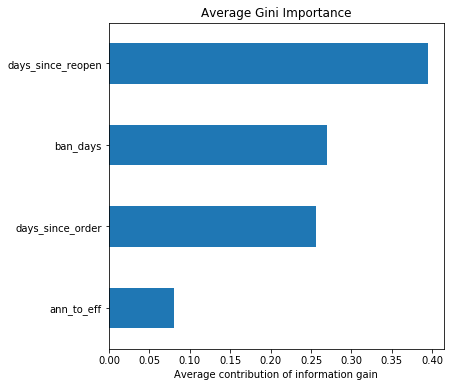

In [86]:
rfr.fit(X_train1, y_train1)

feature_scores = pd.Series(rfr.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

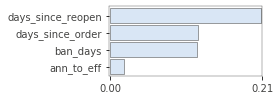

In [87]:
imp = importances(rfr, X_test1, y_test1, n_samples=-1)
viz = plot_importances(imp)
viz.view()

**Model: Random Forest Classifier**

In [88]:
rfc = RandomForestClassifier()
rfc.fit(X_train1, y_train1)

rfc.score(X_test1, y_test1)

0.6959287531806616

Text(0.5, 0, 'Average contribution of information gain')

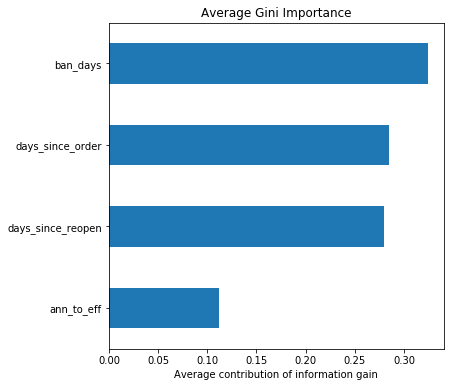

In [89]:
rfc.fit(X_train1, y_train1)

feature_scores = pd.Series(rfc.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

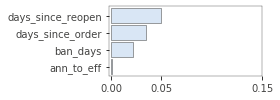

In [90]:
imp = importances(rfc, X_test1, y_test1, n_samples=-1)
viz = plot_importances(imp)
viz.view()

In [247]:
rf1 = rfc.fit(X_train1, y_train1)
confusion_matrix(y_test1, rf1.predict(X_test1))

array([[351,  91,   0],
       [135, 178,   0],
       [ 12,  19,   0]])

**Model = Logistic Regression**

In [113]:
lr = LogisticRegression()
lr.fit(X_train1, y_train1)

lr.score(X_test1, y_test1)

0.6157760814249363

## Have cases decreased since the previous day?

In [198]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xdf, y2df)

**Model: Random Forest Regressor**

In [199]:
rfr2 = RandomForestRegressor()
rfr2.fit(X_train2, y_train2)

rfr2.score(X_test2, y_test2)

0.013059441163954523

Text(0.5, 0, 'Average contribution of information gain')

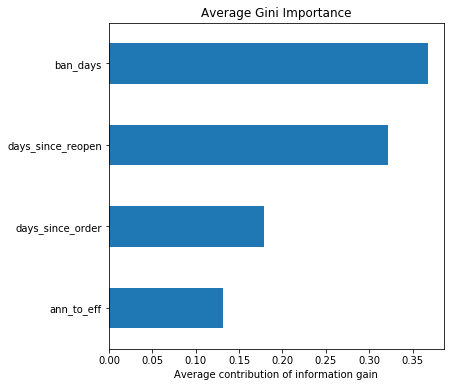

In [200]:
rfr2.fit(X_train2, y_train2)

feature_scores = pd.Series(rfr2.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

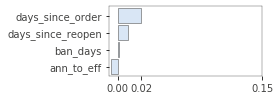

In [201]:
imp = importances(rfr2, X_test2, y_test2, n_samples=-1)
viz = plot_importances(imp)
viz.view()

**Model: Random Forest Classifier**

In [210]:
rfc2 = RandomForestClassifier()
rfc2.fit(X_train2, y_train2)

rfc2.score(X_test2, y_test2)

0.9720101781170484

Text(0.5, 0, 'Average contribution of information gain')

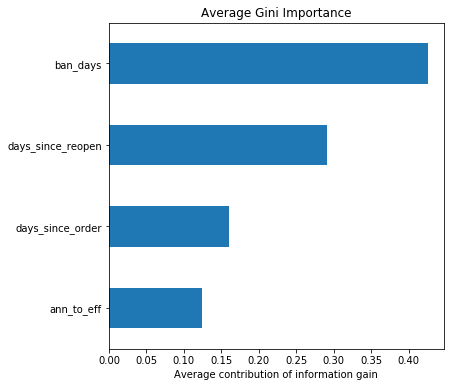

In [211]:
rfc2.fit(X_train2, y_train2)

feature_scores = pd.Series(rfc2.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

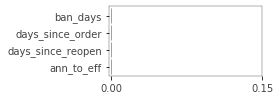

In [212]:
imp = importances(rfc2, X_test2, y_test2, n_samples=-1)
viz = plot_importances(imp)
viz.view()

**model: logistic regression**

In [205]:
lr = LogisticRegression()
lr.fit(X_train2, y_train2)

lr.score(X_test2, y_test2)

0.9720101781170484

In [213]:
#my_rf = rfc.fit(X_train2, y_train2)
confusion_matrix(y_test1, rfc2.predict(X_test2))

array([[442,   0,   0],
       [313,   0,   0],
       [ 31,   0,   0]])

## Have active cases increased, decreased, or remained the same as the previous day?

In [157]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(Xdf, y3)


**model: random forest regression**

In [170]:
rfr = RandomForestRegressor()
rfr.fit(X_train3, y_train3)

rfr.score(X_test3, y_test3)


0.22747557936613672

Text(0.5, 0, 'Average contribution of information gain')

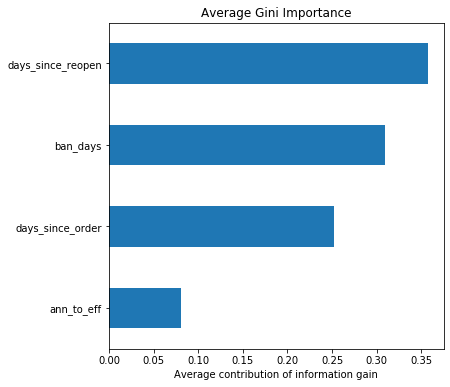

In [171]:
feature_scores = pd.Series(rfr.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

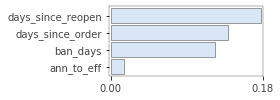

In [172]:
imp = importances(rfr, X_test3, y_test3, n_samples=-1)
viz = plot_importances(imp)
viz.view()

**model: random forest classification**

In [173]:
rfc = RandomForestClassifier()
rfc.fit(X_train3, y_train3)

rfc.score(X_test3, y_test3)

0.6908396946564885

Text(0.5, 0, 'Average contribution of information gain')

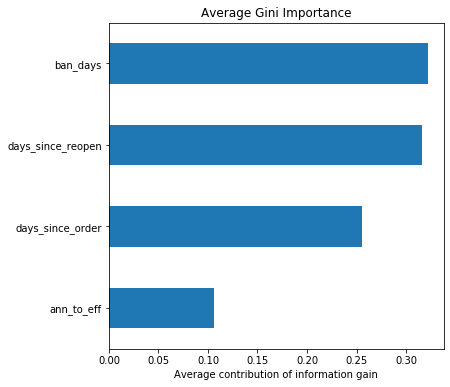

In [164]:
feature_scores = pd.Series(rfc.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

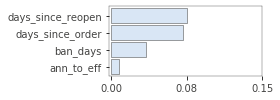

In [165]:
imp = importances(rfc, X_test3, y_test3, n_samples=-1)
viz = plot_importances(imp)
viz.view()

**model: logistic regression**

In [168]:
lr = LogisticRegression()
lr.fit(X_train3, y_train3)

lr.score(X_test3, y_test3)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5826972010178118

X_train, X_test, y_train, y_test = train_test_split(Xdf, ydf)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)


feature_scores = pd.Series(model.feature_importances_, index=Xdf.columns)
feature_scores = feature_scores.sort_values()

ax = feature_scores.plot(kind='barh', figsize=(6,6))
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution of information gain')

imp = importances(model, X_test, y_test, n_samples=-1)
viz = plot_importances(imp)
viz.view()